# In this notebook, we run an MLP model on dataset hoda and examine the results in terms of underfitting, fitting and overfitting.

## Download dataset

In [4]:
!gdown --fuzzy https://drive.google.com/file/d/1QJrQsEYOfPBn1LoIeYMZ2HFBRC0AY-6F/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1zStcaVl_34RrYIfVObuM4xzB6s8xwvBi/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1QJrQsEYOfPBn1LoIeYMZ2HFBRC0AY-6F
To: /content/dataset.py
100% 909/909 [00:00<00:00, 2.74MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zStcaVl_34RrYIfVObuM4xzB6s8xwvBi
To: /content/Data_hoda_full.mat
100% 3.99M/3.99M [00:00<00:00, 148MB/s]


## Importing libraries

In [5]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,  Activation
from dataset import load_hoda
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,Dense

# Load dataset

In [6]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

### Converting x_train and x_test to ndarray array format and converting y_train and y_test to one-hot-encoding:
####First, we have defined a simple function that prints the dimensions, data type and information of the loaded dataset. We will print this information before and after data preprocessing to notice the changes!

In [7]:
# Preprocess input data for Keras.
x_train = np.array(x_train_original)
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
x_test = np.array(x_test_original)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [5]:
print (x_train.shape)

(1000, 25)


In [8]:
def print_data_info(x_train, y_train, x_test, y_test):
    #Check data Type
    print ("\ttype(x_train): {}".format(type(x_train)))
    print ("\ttype(y_train): {}".format(type(y_train)))

    #check data Shape
    print ("\tx_train.shape: {}".format(np.shape(x_train)))
    print ("\ty_train.shape: {}".format(np.shape(y_train)))
    print ("\tx_test.shape: {}".format(np.shape(x_test)))
    print ("\ty_test.shape: {}".format(np.shape(y_test)))

    #sample data
    print ("\ty_train[0]: {}".format(y_train[0]))

In [9]:
print("Before Preprocessing:")
print_data_info(x_train_original, y_train_original, x_test_original, y_test_original)
print("After Preprocessing:")
print_data_info(x_train, y_train, x_test, y_test)

Before Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000,)
	x_test.shape: (200, 25)
	y_test.shape: (200,)
	y_train[0]: 6
After Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000, 10)
	x_test.shape: (200, 25)
	y_test.shape: (200, 10)
	y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [13]:
# In this Create the model, input dim=25 and output dim = 10

##################################
# you code here
##################################
# model = ...
# input_shape=(x_train.shape, y_train.shape,)

model = Sequential(
    [
        Input(shape=x_train.shape[1]),
        layers.Dense(25, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

# OR
# model = Sequential(
#     [
#         Dense(10, input_dim=25 , name="L1"),

#         Activation( "softmax"),
#     ]
# )


#OR

# model = Sequential()
# model.add(Dense(10, input_dim=25 , name="L1")),
# model.add(Activation( "softmax")),




In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                650       
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
Total params: 910 (3.55 KB)
Trainable params: 910 (3.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile model

In [15]:
# In this cell compile mode, set loss function and optimizer and get metrics accuracy

##################################
# you code here
##################################

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



Epoch 1/15
8/8 [==============================] - 1s 40ms/step - loss: 2.5364 - accuracy: 0.0833 - val_loss: 2.3788 - val_accuracy: 0.0900
Epoch 2/15
8/8 [==============================] - 0s 8ms/step - loss: 2.4504 - accuracy: 0.1067 - val_loss: 2.3293 - val_accuracy: 0.1200
Epoch 3/15
8/8 [==============================] - 0s 7ms/step - loss: 2.3931 - accuracy: 0.1267 - val_loss: 2.2871 - val_accuracy: 0.1300
Epoch 4/15
8/8 [==============================] - 0s 8ms/step - loss: 2.3483 - accuracy: 0.1233 - val_loss: 2.2495 - val_accuracy: 0.1600
Epoch 5/15
8/8 [==============================] - 0s 7ms/step - loss: 2.3180 - accuracy: 0.1389 - val_loss: 2.2150 - val_accuracy: 0.2300
Epoch 6/15
8/8 [==============================] - 0s 10ms/step - loss: 2.2813 - accuracy: 0.1533 - val_loss: 2.1814 - val_accuracy: 0.2300
Epoch 7/15
8/8 [==============================] - 0s 14ms/step - loss: 2.2313 - accuracy: 0.1544 - val_loss: 2.1509 - val_accuracy: 0.2500
Epoch 8/15
8/8 [===============

## Fit model

In [16]:
MLP_model = model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
16/16 [==============================] - 0s 8ms/step - loss: 1.9600 - accuracy: 0.3030 - val_loss: 1.8185 - val_accuracy: 0.5650
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 1.8615 - accuracy: 0.3460 - val_loss: 1.7417 - val_accuracy: 0.6200
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 1.8030 - accuracy: 0.4000 - val_loss: 1.6669 - val_accuracy: 0.6500
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 1.7331 - accuracy: 0.4060 - val_loss: 1.5936 - val_accuracy: 0.6850
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 1.6641 - accuracy: 0.4540 - val_loss: 1.5204 - val_accuracy: 0.7250
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 1.6215 - accuracy: 0.4760 - val_loss: 1.4502 - val_accuracy: 0.7450
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 1.5577 - accuracy: 0.4890 - val_loss: 1.3810 - val_accuracy: 0.7650
Epoch 8/100
1

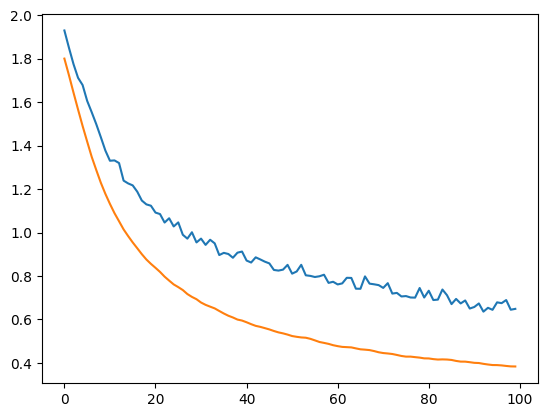

In [13]:
# plot Loss
plt.plot(MLP_model.history["loss"])
plt.plot(MLP_model.history["val_loss"])

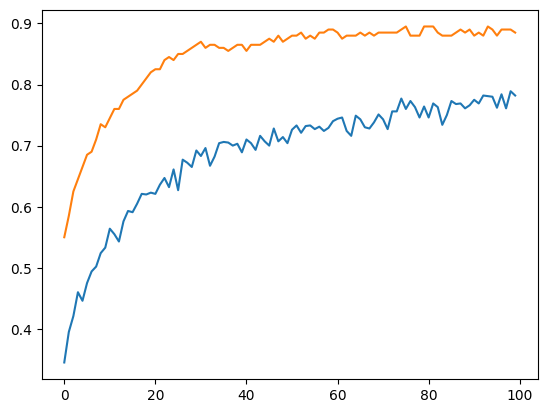

In [14]:
# plot accuracy
plt.plot(MLP_model.history["accuracy"])
plt.plot(MLP_model.history["val_accuracy"])